<p style='text-align:center; font-size: 36px; color:#0B0B23; font-weight: bold;'>Medical Data Visualizer</p>

In this project, i will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

<p style='font-size: 24px; color:#0B0B23; font-weight: bold;'>Data description</p>

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. I will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

### Let's start

First i'm going to import all libs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Import the data

In [2]:
df = pd.read_csv('data/medical_examination.csv')

Let's see a sample of it

In [3]:
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
51307,73184,23222,1,168,78.0,110,80,3,1,0,0,1,1
22138,31624,17502,1,178,68.0,110,80,1,1,0,0,0,0
18265,26087,21273,2,171,94.0,160,90,1,2,1,0,1,1
48000,68536,18908,1,159,62.0,110,80,1,3,0,0,1,1
48284,68951,15850,1,158,61.0,120,70,3,3,0,0,1,0


Now let's add a 'overweight' column

In [4]:
df['overweight'] = (df.weight / ((df.height / 100)**2))
df.overweight = df.overweight > 25
df.overweight = df.overweight.astype(int)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
48325,69007,20433,1,163,75.0,140,90,1,1,0,0,1,0,1
64299,91773,15988,1,168,71.0,140,80,1,1,0,0,1,1,1
830,1159,20345,2,167,84.0,110,75,1,1,0,0,1,1,1
16893,24149,22743,1,176,93.0,120,80,2,2,0,0,1,1,1
42581,60835,15823,1,159,58.0,120,80,1,1,0,0,1,1,0


And normalize the data in cholesterol and gluc, 0 = good, 1 = bad

In [5]:
df.gluc = df.gluc > 1
df.gluc = df.gluc.astype(int)
df.cholesterol = df.cholesterol > 1
df.cholesterol = df.cholesterol.astype(int)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
1593,2253,20259,2,169,65.0,120,70,0,0,0,0,1,1,0
53214,75913,16708,2,185,80.0,110,69,1,0,1,0,1,1,0
69775,99664,20317,2,169,77.0,130,80,0,0,0,0,1,0,1
35909,51276,19770,1,159,66.0,140,90,1,0,0,0,1,1,1
51430,73344,21149,1,157,59.0,120,70,0,0,0,0,1,0,0


### Now we can create a plot to show us the value counts of categorical features

I'm going to create a new dataframe with only the columns i'm interested in plotting

In [6]:
df_cat = pd.melt(df, id_vars='id', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,id,variable,value
0,0,active,1
1,1,active,1
2,2,active,0
3,3,active,1
4,4,active,0
...,...,...,...
419995,99993,smoke,1
419996,99995,smoke,0
419997,99996,smoke,0
419998,99998,smoke,0


And add the cardio column to each person

In [7]:
df_cardios = pd.concat([df.cardio] * 6, axis=0, ignore_index=True)
df_cat['cardio'] = df_cardios
df_cat

,id,variable,value,cardio
0,0,active,1,0
1,1,active,1,1
2,2,active,0,1
3,3,active,1,1
4,4,active,0,0
...,...,...,...,...
419995,99993,smoke,1,0
419996,99995,smoke,0,1
419997,99996,smoke,0,1
419998,99998,smoke,0,1


Then finally plot it with seaborn's catplot

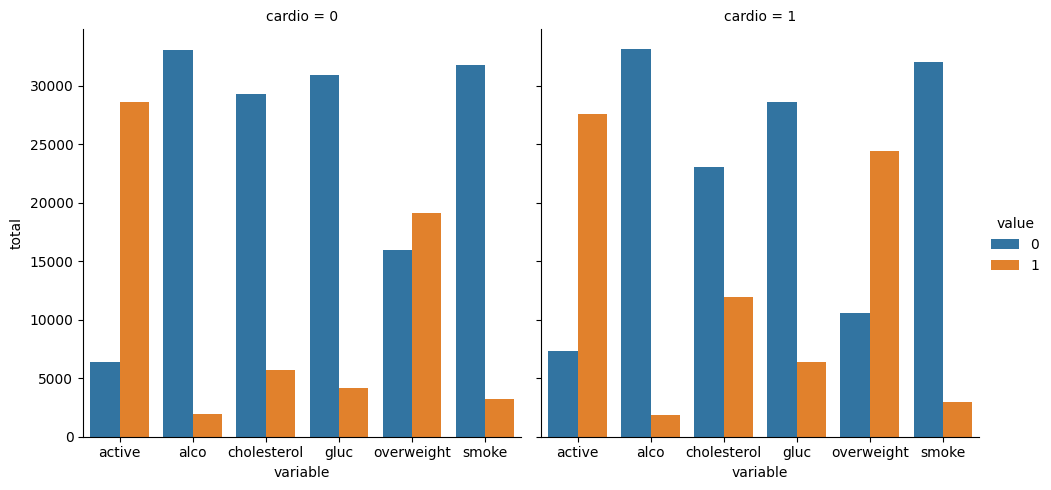

In [9]:
plot = sns.catplot(data=df_cat, x='variable', hue='value', kind='count', col='cardio')
plot.set_ylabels('total')

The biggest descrepancy we can see in this plot is that people with cardiovascular disease (cardio = 1) are way more likely to get overweight, still after doing more physical activity (active) than who don't have

We can also see that cholesterol and glucose rates are worse in people with cardiovascular disease while the alcohol intake and smoking stay practically the same

### Now let's plot a heatmap showing the correlation of each column

First i'm going to clean the data with incorrect numbers

In [10]:
df_heat = df[
      (df['ap_lo'] <= df['ap_hi']) &
      (df['height'] >= df['height'].quantile(0.025)) &
      (df['height'] <= df['height'].quantile(0.975)) &
      (df['weight'] >= df['weight'].quantile(0.025)) &
      (df['weight'] <= df['weight'].quantile(0.975))
]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


Once cleaned we can plot the heat map

<AxesSubplot: >

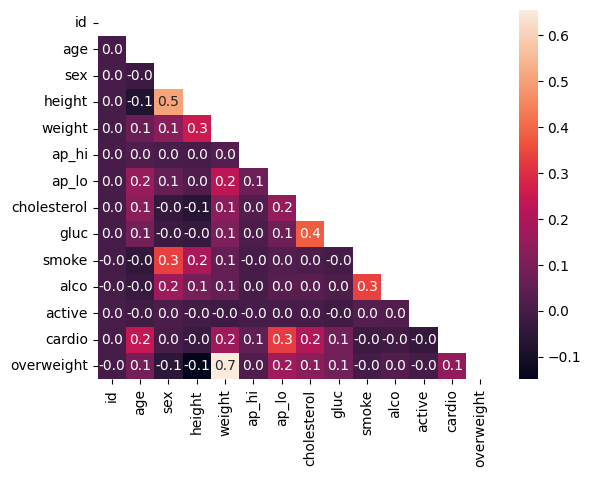

In [11]:
corr = df_heat.corr()
mask = np.triu(df.corr())
sns.heatmap(corr, fmt='.1f', annot=True, mask=mask)

Looking at this beatiful heatmap is easy to know what influences what


#### Like, weight is directly linked to overweight duh


#### Or that height is linked with sex, since men are taller than women


#### Gluc linked to cholesterol


#### Physical activity isn't linked to none of the columns, everybody does


These are just some of the conclusions we can bring out of this plot